# Task 2

In [1]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File paths
customers_file = r"C:\Users\PRAGNA\Downloads\Customers.csv"
products_file = r"C:\Users\PRAGNA\Downloads\Products.csv"
transactions_file = r"C:\Users\PRAGNA\Downloads\Transactions.csv"

# Loading the datasets
customers = pd.read_csv(customers_file)
products = pd.read_csv(products_file)
transactions = pd.read_csv(transactions_file)

### Feature Engineering

In [2]:
# Merge customer information with their transaction data
customer_transactions = transactions.merge(customers, on='CustomerID', how='left')
customer_transactions

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


#### Calculate Total Spending

In [3]:
# For simplicity, let's focus on the total spending per customer and some demographic information.
customer_spending = customer_transactions.groupby('CustomerID')['TotalValue'].sum().reset_index()
customer_spending = customer_spending.rename(columns={'TotalValue': 'TotalSpending'})

customer_spending

,CustomerID,TotalSpending
0,C0001,3354.52
1,C0002,1862.74
2,C0003,2725.38
3,C0004,5354.88
4,C0005,2034.24
...,...,...
194,C0196,4982.88
195,C0197,1928.65
196,C0198,931.83
197,C0199,1979.28


In [4]:
print(customer_spending.isnull().sum())

CustomerID       0
TotalSpending    0
dtype: int64


#### One Hot Encoding regions

In [5]:
# Merging with customers to add demographic info
customer_profiles = pd.merge(customers, customer_spending, on='CustomerID', how='left')

# Let's create a matrix for similarity calculation: using total spending, region as features.
# For now, let's use TotalSpending, Region (one-hot encoded).
# Region encoding (one-hot encoding for categorical variables)
customer_profiles_encoded = pd.get_dummies(customer_profiles[ 'Region'], drop_first=True)
customer_profiles_encoded['TotalSpending'] = customer_profiles['TotalSpending']

customer_profiles_encoded

,Europe,North America,South America,TotalSpending
0,False,False,True,3354.52
1,False,False,False,1862.74
2,False,False,True,2725.38
3,False,False,True,5354.88
4,False,False,False,2034.24
...,...,...,...,...
195,True,False,False,4982.88
196,True,False,False,1928.65
197,True,False,False,931.83
198,True,False,False,1979.28


#### Normalization

In [6]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# List of columns that need to be scaled (in this case, only TotalSpending)
numerical_features = ['TotalSpending']

# Apply scaling to the numerical columns
customer_profiles_encoded[numerical_features] = scaler.fit_transform(customer_profiles_encoded[numerical_features])

# Show the resulting dataframe with normalized numerical features
customer_profiles_encoded.head()


,Europe,North America,South America,TotalSpending
0,False,False,True,-0.061701
1,False,False,False,-0.877744
2,False,False,True,-0.405857
3,False,False,True,1.032547
4,False,False,False,-0.783929


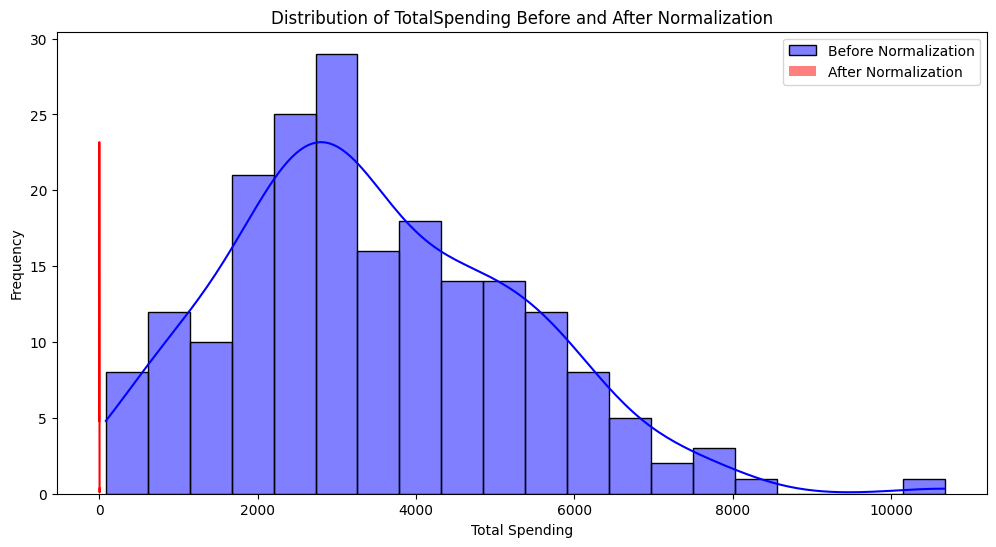

In [ ]:
# Normalization Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of TotalSpending before normalization
plt.figure(figsize=(12, 6))

# Plot before normalization
sns.histplot(customer_profiles['TotalSpending'], kde=True, color='blue', label='Before Normalization', bins=20)

# Plot after normalization
sns.histplot(customer_profiles_encoded['TotalSpending'], kde=True, color='red', label='After Normalization', bins=20)

# Adding titles and labels
plt.title('Distribution of TotalSpending Before and After Normalization')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()


#### Treating Missing Values by Imputing them

Europe           0
North America    0
South America    0
TotalSpending    1
dtype: int64


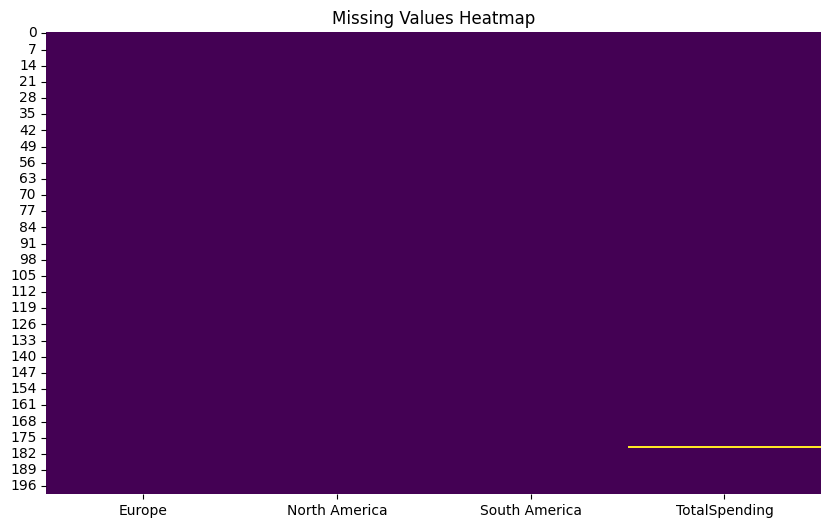

In [8]:
# Check for missing values in the dataset
missing_values = customer_profiles_encoded.isna().sum()

# Show the count of missing values per column
print(missing_values)

# You can also visualize missing values with a heatmap using seaborn (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(customer_profiles_encoded.isna(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


In [9]:
# Impute with the mean of the column (if numeric)
customer_profiles_encoded.fillna(customer_profiles_encoded.mean(), inplace=True)

# Now, let's check if the missing value is handled
print(customer_profiles_encoded.isna().sum())

Europe           0
North America    0
South America    0
TotalSpending    0
dtype: int64


Europe           0
North America    0
South America    0
TotalSpending    0
dtype: int64


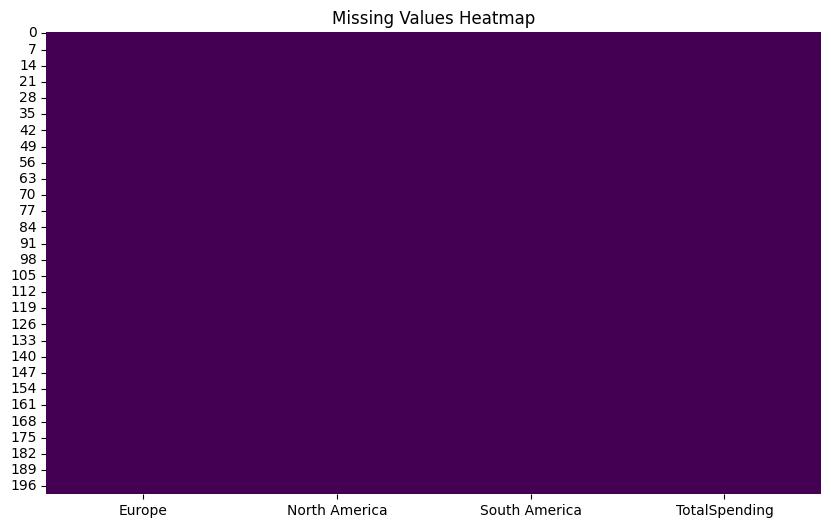

In [10]:
# Check for missing values in the dataset
missing_values = customer_profiles_encoded.isna().sum()

# Show the count of missing values per column
print(missing_values)

# You can also visualize missing values with a heatmap using seaborn (optional)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(customer_profiles_encoded.isna(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

#### Model Building using Cosine Similarity

In [32]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

# Step 1: Compute the Cosine Similarity between customers
cosine_sim = cosine_similarity(customer_profiles_encoded)

# Step 2: Convert the similarity matrix into a DataFrame for easy manipulation
cosine_sim_df = pd.DataFrame(cosine_sim, index=customer_profiles['CustomerID'], columns=customer_profiles['CustomerID'])

# Step 3: Function to get the top N similar customers
def get_top_n_similar(customers, cosine_sim_df, top_n=3):
    similar_customers = {}
    for customer in customers:
        # Get the cosine similarity values for the current customer
        sim_scores = cosine_sim_df[customer]
        
        # Sort the similarity scores in descending order and remove the current customer from the list
        sorted_similarities = sim_scores.sort_values(ascending=False)[1:top_n+1]
        
        # Store the top N similar customers and their similarity scores
        similar_customers[customer] = list(zip(sorted_similarities.index, sorted_similarities.values))
    
    return similar_customers

# Step 4: Get the top 3 similar customers for the first 20 customers
top_3_similar_customers = get_top_n_similar(customer_profiles['CustomerID'][:20], cosine_sim_df)

# Step 5: Format the data into a structure suitable for a DataFrame
lookalike_data = []

for customer_id, similar_customers in top_3_similar_customers.items():
    for similar_customer, score in similar_customers:
        lookalike_data.append([customer_id, similar_customer, score])

# Step 6: Create a DataFrame with the proper structure
lookalike_df = pd.DataFrame(lookalike_data, columns=['CustomerID', 'SimilarCustomerID', 'SimilarityScore'])

# Show the top 3 similar customers for the first 20 customers
lookalike_df

,CustomerID,SimilarCustomerID,SimilarityScore
0,C0001,C0181,0.999993
1,C0001,C0137,0.999928
2,C0001,C0152,0.999854
3,C0002,C0005,1.000000
4,C0002,C0007,1.000000
5,C0002,C0027,1.000000
6,C0003,C0085,0.998307
7,C0003,C0133,0.997050
8,C0003,C0174,0.996752
9,C0004,C0155,0.999982


In [33]:
# Check the structure of cosine_sim_df
cosine_sim_df

CustomerID,C0001,C0002,C0003,C0004,C0005,C0006,C0007,C0008,C0009,C0010,...,C0191,C0192,C0193,C0194,C0195,C0196,C0197,C0198,C0199,C0200
CustomerID,,,,,,,,,,,,,,,,,,,,,
C0001,1.000000,0.061584,0.947994,0.650136,0.061584,0.897934,0.061584,-0.024801,0.050189,0.042583,...,0.982062,0.830902,0.061584,-0.013222,0.934710,-0.039305,0.039657,0.049954,0.038878,-0.061584
C0002,0.061584,1.000000,0.376065,-0.718338,1.000000,-0.383996,1.000000,-0.402716,0.814965,0.691466,...,0.248678,0.606533,1.000000,-0.214699,-0.297173,-0.638238,0.643949,0.811152,0.631290,-1.000000
C0003,0.947994,0.376065,1.000000,0.374485,0.376065,0.711149,0.376065,-0.151447,0.306480,0.260036,...,0.991005,0.964791,0.376065,-0.080741,0.772977,-0.240019,0.242167,0.305046,0.237406,-0.376065
C0004,0.650136,-0.718338,0.374485,1.000000,-0.718338,0.918198,-0.718338,0.289286,-0.585420,-0.496706,...,0.495205,0.117422,-0.718338,0.154226,0.877736,0.458470,-0.462573,-0.582681,-0.453479,0.718338
C0005,0.061584,1.000000,0.376065,-0.718338,1.000000,-0.383996,1.000000,-0.402716,0.814965,0.691466,...,0.248678,0.606533,1.000000,-0.214699,-0.297173,-0.638238,0.643949,0.811152,0.631290,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C0196,-0.039305,-0.638238,-0.240019,0.458470,-0.638238,0.245081,-0.638238,0.257029,-0.074013,0.114819,...,-0.158716,-0.387112,-0.638238,0.137029,0.189667,1.000000,0.177986,-0.067479,0.194133,0.638238
C0197,0.039657,0.643949,0.242167,-0.462573,0.643949,-0.247274,0.643949,-0.259329,0.968161,0.997961,...,0.160136,0.390577,0.643949,-0.138255,-0.191364,0.177986,1.000000,0.969780,0.999865,-0.643949
C0198,0.049954,0.811152,0.305046,-0.582681,0.811152,-0.311479,0.811152,-0.326664,0.999979,0.983374,...,0.201716,0.491991,0.811152,-0.174154,-0.241052,-0.067479,0.969780,1.000000,0.965639,-0.811152


In [34]:
# Choose a target customer
target_customer = 'C0001'

# Extract the similarity scores for the target customer from the DataFrame
similarities = cosine_sim_df.loc[target_customer]

# Sort the similarity scores in descending order, excluding the target customer (similarity with self is always 1)
sorted_similarities = similarities.drop(target_customer).sort_values(ascending=False)

# Get the top 3 most similar customers
top_3_similar_customers = sorted_similarities.head(3)

# Show the top 3 similar customers and their similarity scores
print(top_3_similar_customers)


CustomerID
C0181    0.999993
C0137    0.999928
C0152    0.999854
Name: C0001, dtype: float64


In [35]:
# Check the first few CustomerIDs from both dataframes
print("CustomerIDs from customer_profiles:")
print(customer_profiles['CustomerID'][:20])

print("\nCustomerIDs from cosine_sim_df columns:")
print(cosine_sim_df.columns[:20])


CustomerIDs from customer_profiles:
0     C0001
1     C0002
2     C0003
3     C0004
4     C0005
5     C0006
6     C0007
7     C0008
8     C0009
9     C0010
10    C0011
11    C0012
12    C0013
13    C0014
14    C0015
15    C0016
16    C0017
17    C0018
18    C0019
19    C0020
Name: CustomerID, dtype: object

CustomerIDs from cosine_sim_df columns:
Index(['C0001', 'C0002', 'C0003', 'C0004', 'C0005', 'C0006', 'C0007', 'C0008',
       'C0009', 'C0010', 'C0011', 'C0012', 'C0013', 'C0014', 'C0015', 'C0016',
       'C0017', 'C0018', 'C0019', 'C0020'],
      dtype='object', name='CustomerID')


In [36]:
# Corrected function for getting top N similar customers
def get_top_n_similar(customer_id, cosine_sim_df, top_n=3):
    # Get the similarity scores for the customer
    sim_scores = cosine_sim_df.loc[customer_id]
    
    # Sort the similarity scores in descending order and remove the current customer from the list
    sorted_similarities = sim_scores.sort_values(ascending=False)[1:top_n+1]
    
    # Get the top N similar customers
    top_similar_customers = sorted_similarities.index.tolist()
    
    return top_similar_customers

# Create a dictionary to store top 3 similar customers for the first 20 customers
top_3_similar_customers = {}

# Iterate over the first 20 customer IDs
for customer_id in customer_profiles['CustomerID'][:20]:
    # Get the top 3 similar customers based on the cosine similarity DataFrame
    top_3_similar = get_top_n_similar(customer_id, cosine_sim_df)
    
    # Store the results in the dictionary
    top_3_similar_customers[customer_id] = top_3_similar

# Display the results
for customer_id, top_3 in top_3_similar_customers.items():
    print(f"\nTop 3 similar customers to {customer_id}:")
    print(top_3)



Top 3 similar customers to C0001:
['C0181', 'C0137', 'C0152']

Top 3 similar customers to C0002:
['C0005', 'C0007', 'C0027']

Top 3 similar customers to C0003:
['C0085', 'C0133', 'C0174']

Top 3 similar customers to C0004:
['C0155', 'C0148', 'C0012']

Top 3 similar customers to C0005:
['C0005', 'C0007', 'C0027']

Top 3 similar customers to C0006:
['C0039', 'C0195', 'C0169']

Top 3 similar customers to C0007:
['C0005', 'C0007', 'C0027']

Top 3 similar customers to C0008:
['C0079', 'C0067', 'C0117']

Top 3 similar customers to C0009:
['C0198', 'C0121', 'C0119']

Top 3 similar customers to C0010:
['C0062', 'C0132', 'C0197']

Top 3 similar customers to C0011:
['C0158', 'C0107', 'C0048']

Top 3 similar customers to C0012:
['C0171', 'C0004', 'C0155']

Top 3 similar customers to C0013:
['C0096', 'C0102', 'C0163']

Top 3 similar customers to C0014:
['C0060', 'C0009', 'C0198']

Top 3 similar customers to C0015:
['C0094', 'C0144', 'C0020']

Top 3 similar customers to C0016:
['C0194', 'C0183', '

In [37]:
import pandas as pd

# Create a dictionary to store the lookalikes for the first 20 customers
lookalike_map = {}

# Iterate over the first 20 customer IDs
for customer_id in customer_profiles['CustomerID'][:20]:
    # Get the top 3 similar customers and their similarity scores
    top_3_similar = get_top_n_similar(customer_id, cosine_sim_df)
    
    # Map each customer ID to a list of its top 3 lookalikes with similarity scores
    lookalike_scores = []
    for similar_customer in top_3_similar:
        score = cosine_sim_df.loc[customer_id, similar_customer]
        lookalike_scores.append([similar_customer, score])
    
    # Store the lookalikes and their scores for each customer
    lookalike_map[customer_id] = lookalike_scores

# Convert the lookalike map to a DataFrame
lookalike_df = pd.DataFrame.from_dict(lookalike_map, orient='index')

# Flatten the DataFrame for CSV output
lookalike_flat = lookalike_df.apply(lambda x: x.tolist(), axis=1).reset_index()
lookalike_flat.columns = ['CustomerID', 'Lookalikes']

# Save to Lookalike.csv
lookalike_flat.to_csv('Lookalike.csv', index=False)

# Display the DataFrame for verification
lookalike_flat.head()


,CustomerID,Lookalikes
0,C0001,"[[C0181, 0.9999928929305478], [C0137, 0.999928..."
1,C0002,"[[C0005, 1.0], [C0007, 1.0], [C0027, 1.0]]"
2,C0003,"[[C0085, 0.9983072090504141], [C0133, 0.997049..."
3,C0004,"[[C0155, 0.9999817702152647], [C0148, 0.999649..."
4,C0005,"[[C0005, 1.0], [C0007, 1.0], [C0027, 1.0]]"


In [23]:
lookalike_flat.to_csv('C:\\Users\\PRAGNA\\Downloads\\Lookalike.csv', index=False)


In [24]:
import os
print(os.getcwd())  # Prints the current working directory


d:\kits23


In [38]:
# List of Customer IDs you want to filter
customer_ids = ['C0001', 'C0181', 'C0137', 'C0152']

# Filter the DataFrame for these Customer IDs
filtered_rows = customer_transactions[customer_transactions['CustomerID'].isin(customer_ids)]

# Print the filtered rows
filtered_rows


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
135,T00015,C0001,P054,2024-01-19 03:12:55,2,114.60,57.30,Lawrence Carroll,South America,2022-07-10
150,T00926,C0181,P054,2024-08-16 02:29:10,3,171.90,57.30,Alexander Barker,South America,2023-11-16
193,T00374,C0181,P038,2024-12-27 17:31:24,2,294.44,147.22,Alexander Barker,South America,2023-11-16
246,T00633,C0137,P003,2024-03-20 23:29:34,3,132.36,44.12,Robert Gardner,South America,2024-04-09
254,T00169,C0152,P051,2024-06-09 15:20:30,1,65.16,65.16,Justin Evans,South America,2022-04-19
338,T00416,C0152,P058,2024-01-13 10:46:55,1,157.62,157.62,Justin Evans,South America,2022-04-19
353,T00770,C0181,P050,2024-09-16 21:24:16,2,875.30,437.65,Alexander Barker,South America,2023-11-16
442,T00932,C0001,P022,2024-09-17 09:01:18,3,412.62,137.54,Lawrence Carroll,South America,2022-07-10
453,T00877,C0137,P021,2024-01-31 15:36:46,2,671.68,335.84,Robert Gardner,South America,2024-04-09
457,T00529,C0152,P072,2024-10-21 06:20:03,3,1198.02,399.34,Justin Evans,South America,2022-04-19
